<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #11: United Nations (UNHCR) Refugee Data</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/united-nations-refugee-data/">https://discovery.cs.illinois.edu/microproject/united-nations-refugee-data/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: United Nations High Commissioner for Refugees (UNHCR) Web API 


The United Nations High Commissioner for Refugees (UNHCR) is a United Nations agency mandated to aid and protect refugees, forcibly displaced communities, and stateless people, and to assist in their voluntary repatriation, local integration or resettlement to a third country. 

The UNHCR has a [database](https://data2.unhcr.org/en/situations) of refugees and internally displaced persons (IDPs) around the world. The data is updated daily and includes information on the number of refugees and IDPs, the countries they are from, the countries they are in, and the number of people who have been displaced by conflict or natural disasters.

In addition to being able to access the database via the web, UNHCR also provides a public [API](https://www.unhcr.org/en-us/global-public-api.html) that allows you to access the data programmatically.  To see the API documentation, click [here](https://api.unhcr.org/docs/index.html).  In this MicroProject, we'll walk you through accessing this API.

<hr style="color: #DD3403;">

## Getting Started: Importing Necessary Libraries

To work with APIs, we need to import the `requests` library, and we'll also need to import `pandas` to work with the data.  Importing the `requests` library is done the same way as any standard Python library.  For example:

```python
import requests
import pandas as pd
```

In [1]:
import requests
import pandas as pd

### Why `requests`?

In several previous MicroProjects, you used `pd.read_json` to access JSON-based APIs.  In this MicroProject, we're going to focus on getting raw access to the data -- by using `requests` library instead of `pandas` -- and transforming that raw data into a DataFrame and data visualization.

<hr style="color: #DD3403;">

## Part 1: Fetching Refugees Data for a Single Year

The UNHCR API allows you to query the data by year, and the first thing we'll need to do is to find what all years are available from the API.

Let's do that!

### Part 1.1: Get Avaliable Years

The [API documentation](https://api.unhcr.org/docs/index.html) includes a GET endpoint that we can use to get a list of all available years of data. The endpoint is:

> ```
> http://api.unhcr.org/rsq/v1/years
> ```

Using the `requests` library, we can make a GET request to this URL. Type the following code into a new cell in your Jupyter notebook.

> ```python
> response = requests.get("http://api.unhcr.org/rsq/v1/years")
> ```

We will also need to convert the response to JSON format. Use the following code to do this.

> ```python
> response.json()
> ```

Save the list of years to a list called `years`.

In [2]:
response = requests.get("http://api.unhcr.org/rsq/v1/years")
years = response.json()
years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

In [3]:
### TEST CASE for Part 1.1: Fetching Refugees Data for a Single Year
assert('years' in vars()), "Did you define a variable called years?."
assert(years[0] < years[1]), "It looks like you did not get the correct `response`."
assert(years[-2] < years[-1]), "It looks like you did not get the correct `response`."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 1.2: Getting the Number of Refugees for a Single Year

According to the United Nations, 2016 is the year with the most refugees. Let's get the number of refugees for 2016.

The documentation includes a GET request to the `/submissions` endpoint. The endpoint takes a parameter called `year`. The request is in the following format, except that `{year}` must be replaced with the year of interest (in our case, 2016):

> ```
> http://api.unhcr.org/rsq/v1/submissions?year={year}
> ```

Just like in Puzzle #1.1, the GET request will return a JSON object.  Fetch the data from the URL above and store the JSON data as `refugees_data_2016` using the same command as you did in the previous puzzle:

> ```py
> refugees_data_2016 = response.json()
> ```

In [4]:
response_2016 = requests.get('http://api.unhcr.org/rsq/v1/submissions?year=2016')
refugees_data_2016 = response_2016.json()
refugees_data_2016

{'results': [{'year': '2016', 'persons': '163206'}],
 'total': 163206,
 'url': '#Z9mI',
 'pagination': '<ul class="pagination"><li class="page-item prev disabled"><span class="page-link"><i aria-hidden="true">&#8249;</i><span class="sr-only">Previous&nbsp;</span></span></li><li class="page-item active"><span class="page-link">1 <span class="sr-only">(current)</span></span></li><li class="page-item next disabled"><span class="page-link"><span class="sr-only">Next&nbsp;</span><i aria-hidden="true">&#8250;</i></span></li></ul>',
 'page': 1,
 'totalPages': 1,
 'chartFilterTypes': {'origin': False, 'asylum': False, 'resettlement': False}}

#### Extract the Total

In the JSON above, there are many fields.  We are interested in the total number of refugees, which is found in the key `total`.  Save just the total key -- by using `refugees_data_2016["total"]` -- in the variable `refugees_2016`:

In [5]:
refugees_2016 = refugees_data_2016['total']
refugees_2016

163206

In [6]:
### TEST CASE for Puzzle 1.2: Getting the Number of Refugees for a Single Year
assert('refugees_2016' in vars()), "Did you define a variable called refugees_2016?"
assert(refugees_2016 == 163206), "It looks like you did not get the correct number of refugees for `refugees_2016`."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Fetching Refugees Data for ALL Years

The UNHCR API allows you to query the data for many years.


### Part 2.1: Creating a Comma-Separated List of All Years

To reduce the amount of API calls for the years, we can use the `year` parameter to get the data for multiple years at once. The `year` parameter can take a list of years.

- To provide a list of years, we need a comma-separated list of years.
- To create a comma-separated list of years, we can use the `join` function to join a list of strings together.

Here's how is works:

--- 

```python
# Example #1:
myList = ["a", "b", "c"]   # Any list.
",".join(myList)           # Joins the list elements with a comma between each element.
# Result: "a,b,c"
```

```python
# Example #2:
myList = ["a", "b", "c"]   # Any list.
";".join(myList)           # Joins the list elements with a semicolon between each element.
# Result: "a;b;c"          # Notice the ; instead of the ,
```

```python
# Example #3:
myList = ["Data", "Science", "DISCOVERY"]
";".join(myList)
# Result: "Data;Science;DISCOVERY"
```

--- 

#### Lists of Integers

Our data is slightly more complex, since we have years as integers (ex: `[2003, 2004, ...]`).  The only additional change we need to make is to convert the list to a string as part of joining the elements together by using the `map` function **inside** of our join function:

--- 

```python
# Example #4:
myList = [20, 30, 40]        # List of integers
",".join(map(str, myList))   # Note the use of the `map(str, ...)` inside of join
# Result: "20,30,40"         #               to convert the integers into strings
```

```python
# Example #5:
myList = [2003, 2004, 2005, 2006]   # List of integers
"+".join(map(str, myList))          # Map the integers to strings, then join them 
# Result: "2003+2004+2005+2006"     #                 with a "+" between each one
```

--- 

#### Creating Our Comma-Separated List of Years

In Puzzle 1.1, you created a `years` variable, let's refresh our memory on what's in it by running the cell below:

In [7]:
years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

Using all that you know now, create a comma-separated list of all years in a variable called `years_csv`:

In [8]:
years_csv = ",".join(map(str, years))
years_csv

'2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025'

### Part 2.2: URL Encoding Multiple Years

Finally, to send a list in a URL, the list needs to be formatted as a URL with "URL Encoding".

- Your `years_csv` contains is a comma-separated string: `"2003,2004,2005,2006[...]"`
- However, URL encoding requires some characters to be "escaped" and would be written as: `"2003%2C2004%2C2005%2C2006[...]`
  - The "escape character" in URL strings is `%` and it must be followed with a two-letter code to represent the escaped character as another character.
  - For example, `?` will be encoded as `%3F` (`3F` is hexadecimal for the number `63`, and `63` is the ASCII code for `?`)
  - Similarly, `,` will be encoded as `%2C` (`2C` is hexadecimal for the number `44`, and `44` is the ASCII code for `,`)
  - Since `%` is the escape character, it must be escaped itself!  (`%` is encoded as `%25`.)


Python provides the `urllib` library and the `urllib.parse.quote` function to do URL encoding.  See the following examples of using `urllib.parse.quote`:

---

```python
import urllib
urllib.parse.quote("?%,")       # All characters need encoding
# Result: %3F%25%2C
```

```python
urllib.parse.quote("2016,2017")  # Only the comma needs encoding
# Result: 2016%2C2017
```

```python
myString = "Hello, world! %)"    # Storing a string in a Python variable
urllib.parse.quote(myString)     #  ...and then encoding the contents of that variable.
# Result: Hello%2C%20world%21%20%25%29
```

---



Use the `urllib.parse.quote` function to encode the variable `years_csv` that you created in the previous code cell.  Save this encoded string as a new variable `encoded_years`:

In [9]:
import urllib
encoded_years = urllib.parse.quote(years_csv)
encoded_years

'2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025'

In [10]:
### TEST CASE for Part 2.1 and 2.2: Fetching Refugees Data
assert('encoded_years' in vars()), "Did you define a variable called encoded_years?"
assert(encoded_years[0:10] == '2003%2C200'), "It looks like you did not encode the string properly."
assert(encoded_years[12:30] == '2C2005%2C2006%2C20'), "It looks like you did not encode the string properly."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.3: Fetching the Number of Refugees for All Years

In Part 1.2, you found the number of refugees in 2016.  Let's get the number of refugees for **ALL** years!

- Identical to Part 1.2, create a `refugees_data_ALL` variable that contains the refugee data from the API for ALL years.

You will still use the same endpoint:

```
http://api.unhcr.org/rsq/v1/submissions?year={year}
```

However, `{year}` should now use your `encoded_years` with all years **INSTEAD OF** just a single year.  Store the response JSON as the variable `refugees_data_ALL`:

In [11]:
response_refugee_all = requests.get('http://api.unhcr.org/rsq/v1/submissions?year=2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022%2C2023%2C2024%2C2025')
refugees_data_ALL = response_refugee_all.json()
refugees_data_ALL

{'results': [{'year': '2003', 'persons': '35314'},
  {'year': '2004', 'persons': '39510'},
  {'year': '2005', 'persons': '46260'},
  {'year': '2006', 'persons': '54182'},
  {'year': '2007', 'persons': '99015'},
  {'year': '2008', 'persons': '121214'},
  {'year': '2009', 'persons': '128558'},
  {'year': '2010', 'persons': '108042'},
  {'year': '2011', 'persons': '91846'},
  {'year': '2012', 'persons': '74840'},
  {'year': '2013', 'persons': '92915'},
  {'year': '2014', 'persons': '103890'},
  {'year': '2015', 'persons': '134044'},
  {'year': '2016', 'persons': '163206'},
  {'year': '2017', 'persons': '75188'},
  {'year': '2018', 'persons': '81337'},
  {'year': '2019', 'persons': '81671'},
  {'year': '2020', 'persons': '39534'},
  {'year': '2021', 'persons': '63190'},
  {'year': '2022', 'persons': '116481'}],
 'total': 2045660,
 'url': '#Xz5W',
 'pagination': '<ul class="pagination"><li class="page-item prev disabled"><span class="page-link"><i aria-hidden="true">&#8249;</i><span class="

#### Create a DataFrame

In the JSON above, there are many fields.  We are interested in the total number of refugees each year, all of which is found in the key `results`.  Since it is already a list of dictionaries, it can automatically be used as a DataFrame.

Using `pd.DataFrame(...)`, create a new DataFrame `refugees_per_year` from the `refugees_data_ALL["results"]` data:

In [12]:
total_refugees = refugees_data_ALL['results']
refugees_per_year = pd.DataFrame(total_refugees)
refugees_per_year

,year,persons
0,2003,35314
1,2004,39510
2,2005,46260
3,2006,54182
4,2007,99015
5,2008,121214
6,2009,128558
7,2010,108042
8,2011,91846
9,2012,74840


In [13]:
### TEST CASE for Part 2.3: Fetching the Number of Refugees for All Years
assert('refugees_per_year' in vars()), "Did you define a variable called refugees_per_year?"
assert(len(refugees_per_year) == 20), "It looks like you did not get the correct data."
assert(refugees_per_year["persons"].iloc[0] == "35314"), "It looks like you did not get the correct response."
assert(refugees_per_year["persons"].iloc[9] == "74840"), "It looks like you did not get the correct response."
assert(refugees_per_year["year"].iloc[10] == "2013"), "It looks like you did not get the correct response."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Creating a Histogram of Refugees by Year

Finally, let's create a histogram!  Since we imported the DataFrame from a JSON object, all of the data in the DataFrame are generic "objects" (even though they're numbers).  You can see the **type** of data being stored in each column by running `refugees_per_year.dtypes`:

In [14]:
refugees_per_year.dtypes

year       object
persons    object
dtype: object

To convert data to the best numeric format, the `pd.to_numeric` transforms a column into a numeric data type.  To convert the "year" column from a generic object:

```python
refugees_per_year['year'] = pd.to_numeric(refugees_per_year['year'])
```

Convert both `year` and `persons` column into numeric columns:

In [20]:
refugees_per_year['year'] = pd.to_numeric(refugees_per_year['year'])
refugees_per_year['persons'] = pd.to_numeric(refugees_per_year['persons'])

Let's check out how the data types (dtypes) have changed:

In [21]:
refugees_per_year.dtypes

year       int64
persons    int64
dtype: object

Finally, let's check out our plot:

<Axes: title={'center': 'Refugees and Internally Displaced Persons (IDPs)'}, xlabel='Year', ylabel='People'>

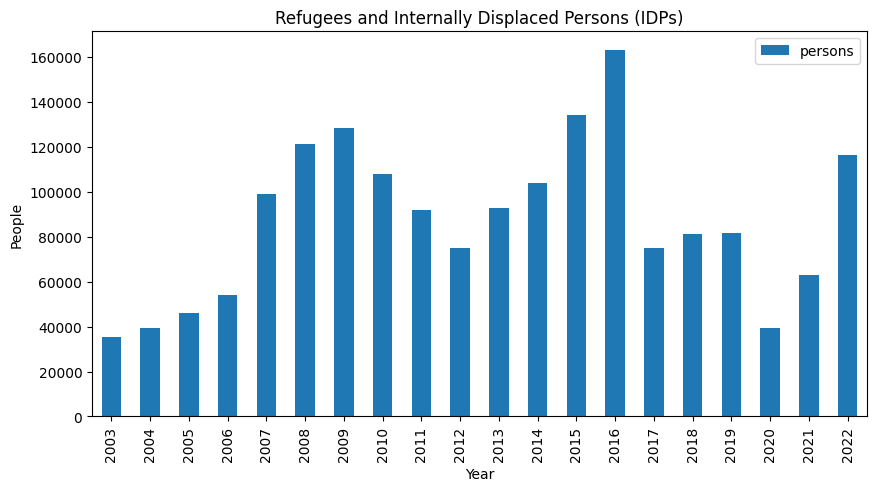

In [22]:
refugees_per_year.plot.bar(
  x='year',
  y='persons',
  figsize=(10, 5),
  title="Refugees and Internally Displaced Persons (IDPs)",
  xlabel="Year",
  ylabel="People",
)

In [23]:
### TEST CASE for Part 3: Creating a Histogram of Refugees by Year
assert('refugees_per_year' in vars()), "Did you define a variable called refugees_per_year?"
assert(str(refugees_per_year.dtypes["year"]) != "object"), "You have the wrong data type for the `year` column."
assert(str(refugees_per_year.dtypes["persons"]) != "object"), "You have the wrong data type for the `persons` column."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/united-nations-refugee-data/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉